# Proyecto muestra aprendizaje 3: Distribución y caracterización de asteroides
---

En este taller vamos a trabajar con un catálogo de objetos en el cinturón de asteroides. Este catálogo contiene las siguientes columnas:

- **Nombre**: Nombre o denominación del asteroide.
- **a**: Semi-eje mayor, es decir, la mayor distancia medida desde el centro de la órbita, en Unidades Astronómicas. Esta distancia es aproximadamente igual a la distancia al Sol si es que la órbita es (casi) circular.
- **col_a, mag_i, mag_z**: Magnitudes (brillo) en distintos filtros. Con estos vamos a construir colores y con ellos se pueden clasificar asteroides según su composición.
- **X, Y, Z**: Posición del asteroide en coordenadas cartesianas con origen en el Sol. Las cantidades se encuentran en Unidades Astronómicas (UA).

---

### Clasificación
Si bien existen muchas clases y subclases, nos enfocaremos en estas tres, pues utilizando los colores de los asteroides nos es posible realizar una primera (y simple) aproximación al tipo de asteroide del que se trata.

- **Clase C**: Objetos con carbono como principal componente. Hygiea y Mathilde son dos ejemplos.
- **Clase S**: Formados principalmente por silicatos (roca). A esta clase pertenecen Eros y Gaspra.
- **Clase V**: Un tipo más raro, relativamente similar al tipo S, pero con mayor presencia de piroxeno. Se le llaman tipo "V" por el ejemplo clásico de esta clase, el asteroide Vesta.

Para clasificar haremos uso de un diagrama color-color, donde en el eje $x$ tenemos al color **col_a**, definido por la siguiente combinación de filtros g, r, i:
$$ a = 0.89(g−r) + 0.45(r−i) − 0.57$$

Mientras que en el eje $y$ tendremos el color **i-z**, el cual debemos confeccionar.

Una vez observada la distribución de los puntos, podemos proceder a la clasificación utilizando las condiciones
- **Clase C**: $ a < 0$
- **Clase S**: $ i-z > -0.15\quad \wedge\quad  a > 0 $
- **Clase V**: $ i-z < -0.15\quad \wedge\quad  a > 0 $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', size=14)
rc('axes', labelsize=22)

Este es el catálogo que contiene todos los datos a usar

In [2]:
data = pd.read_csv('asteroides.csv', sep=',', comment='#', header=0)
data.head()

,Unnamed: 0,Nombre,a,col_a,mag_i,mag_z,X,Y,Z
0,0,1989_SS,3.025812,0.051252,17.102579,17.050037,1.214,-2.976,0.570
1,1,Helenos,5.297075,-0.010436,17.790953,17.673072,1.329,5.143,-1.275
2,2,2003_YD179,5.300624,0.036357,20.074894,19.974442,1.203,5.328,0.549
3,3,2007_EW43,5.162462,-0.050136,20.210977,20.409555,1.908,5.004,-1.534
4,4,1989_UE5,5.170706,0.067524,20.032290,19.959746,1.915,4.811,-1.037


(-0.8, 0.6)

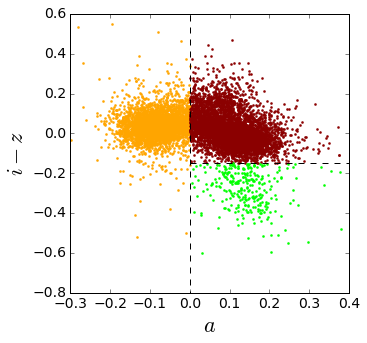

In [3]:
iz = data['mag_i'] - data['mag_z']

cC = data['col_a'] < 0
cS = (-cC) & (iz > -0.15)
cV = (-cC) & (iz < -0.15)
clase = [cC, cS, cV]
color = ['orange', 'darkred', 'lime']

fig, ax = plt.subplots(figsize=[5,5])
ax.plot(data['col_a'][cC], iz[cC], '.', ms=4, c='orange')
ax.plot(data['col_a'][cS], iz[cS], '.', ms=4, c='darkred')
ax.plot(data['col_a'][cV], iz[cV], '.', ms=4, c='lime')

ax.plot([0,0], [-1,1], '--k')
ax.plot([0,1], [-0.15,-0.15], '--k')

ax.set_xlabel('$a$')
ax.set_ylabel('$i-z$')

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

# Ideas para el taller
---

## Examinar la distribución espacial
Sería interesante añadir un catálogo de los planetas del Sistema Solar (y dibujar sus órbitas), de modo que al menos puedan visualizar Marte y Júpiter, además de la posición de este último en comparación con los Troyanos.

Opciones a los graficos: Añadir alpha (transparencia) o graficar las clases por separado en vez de superpuestas.

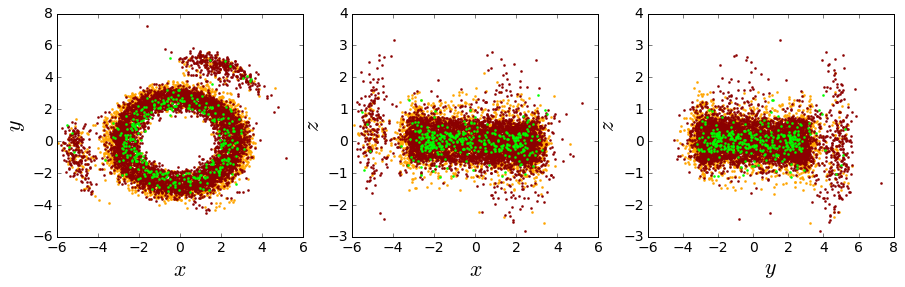

In [4]:
fig, ax = plt.subplots(figsize=[3*5,4], ncols=3)
for i,c in enumerate(clase):
    ax[0].plot(data['X'][c], data['Y'][c], '.', color=color[i], ms=4)
    ax[0].set(xlabel='$x$', ylabel='$y$')
    
    ax[1].plot(data['X'][c], data['Z'][c], '.', color=color[i], ms=4)
    ax[1].set(xlabel='$x$', ylabel='$z$')

    ax[2].plot(data['Y'][c], data['Z'][c], '.', color=color[i], ms=4)
    ax[2].set(xlabel='$y$', ylabel='$z$')

## Encontrar correlaciones con otros parametros
Las más destacable es semi eje mayor vs seno de la inclinación. Haciendo el histograma del semi eje mayor se obtiene un resultado similar.

En este gráfico se aprecian los huecos de Kirkwood, que se encuentran a determinadas distancias, cuyo período (Kepler) se encuentra en resonancia con Júpiter. Explorando diversas combinaciones se encuentran los diferentes bordes (huecos) o familias de asteroides. Un caso notable es el de los troyanos utilizando el período de Júpiter.

Una vez encontrado estas familias, se pueden volver a hacer los gráficos de posición para ver dónde se ubican. Por ejemplo los Hildas (ver figuras de https://en.wikipedia.org/wiki/Hilda_family). Creo que hay muy pocos en este catálogo pero se puede usar eventualmente el catálogo completo del SDSS.

Se puede también separar familias y comparar el promedio (y sacar desviación estándar) con el resultado obtenido por resonancia.

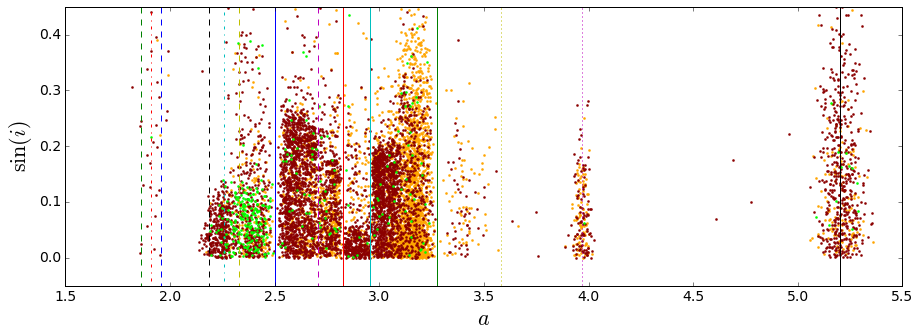

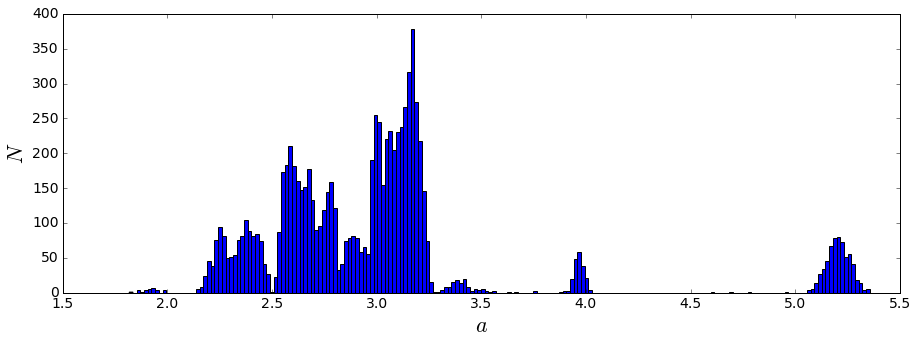

In [5]:
#Inclinacion
cat  = np.sqrt(data['X']**2 + data['Y']**2)
hip  = np.sqrt(data['Z']**2 + cat**2)
sini = np.abs(data['Z'] / hip)

Pj = 11.864643836 #Periodo de jupiter en yrs

fig, ax = plt.subplots(figsize=[5*3,5])
for i in range(3):
    ax.plot(data['a'][clase[i]], sini[clase[i]], '.', c=color[i], ms=4)

#Los huecos de Kirkwood mas importantes estan en las resonancias 1:3, 2:3, 2:5 y 3:7
ax.plot([(Pj/3)**(2/3), (Pj/3)**(2/3)], [-1,1])
ax.plot([(Pj/2)**(2/3), (Pj/2)**(2/3)], [-1,1])
ax.plot([(2*Pj/5)**(2/3), (2*Pj/5)**(2/3)], [-1,1])
ax.plot([(3*Pj/7)**(2/3), (3*Pj/7)**(2/3)], [-1,1])

#En general, se encuentran mas resultados interesantes en las resonancias 3:n
ax.plot([(3*Pj/8)**(2/3), (3*Pj/8)**(2/3)], [-1,1], '--')
ax.plot([(3*Pj/10)**(2/3), (3*Pj/10)**(2/3)], [-1,1], '--')
ax.plot([(3*Pj/11)**(2/3), (3*Pj/11)**(2/3)], [-1,1], '--')
ax.plot([(3*Pj/13)**(2/3), (3*Pj/13)**(2/3)], [-1,1], '--')
ax.plot([(3*Pj/14)**(2/3), (3*Pj/14)**(2/3)], [-1,1], '--')

#Otras interesantes que caen sobre las familias de asteroides
ax.plot([(2*Pj/9)**(2/3), (2*Pj/9)**(2/3)], [-1,1], '-.')
ax.plot([(2*Pj/7)**(2/3), (2*Pj/7)**(2/3)], [-1,1], '-.')

#Otras
ax.plot([(2*Pj/3)**(2/3), (2*Pj/3)**(2/3)], [-1,1], ':') #Hildas
ax.plot([(4*Pj/7)**(2/3), (4*Pj/7)**(2/3)], [-1,1], ':')

#Ademas los troyanos se encuentran en la orbita de jupiter
ax.plot([(Pj)**(2/3), (Pj)**(2/3)], [-1,1])

ax.set_ylim(-0.05,0.45)
ax.set_xlabel('$a$')
ax.set_ylabel('$\sin(i)$')

fig, ax = plt.subplots(figsize=[5*3,5])
_ = ax.hist(data['a'], bins=200)
ax.set_ylabel('$N$')
ax.set_xlabel('$a$')

## Más ideas para realizar

- Tomar el catalogo completo (muchos más datos), con excentricidad, sin(i) obtenido desde SDSS, etc. En particular el gráfico de e vs sin(i) da bastante bueno y se ven agrupaciones de familias

- Del mismo catálogo se puede utlizar la magnitud absoluta (H) y el albedo (A) para estimar los diámetros y la masa (asumiendo la densidad y forma esférica). Con ello deberían obtener algo como https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Masses_of_asteroids_vs_main_belt.png/1024px-Masses_of_asteroids_vs_main_belt.png y pueden realizar comparaciones con la Tierra o la Luna, por ejemplo.

- Como bonus y a modo más lúdico podrían averiguar de dónde reciben los nombres los asteroides o familias y ver si encuentran también algún tipo de correlación con algún parámetro.

- Relacionado con lo último también se podrían obtener imágenes del SDSS si es que es posible.